# Planarian lineages: subsampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.0.3 anndata==0.5.8 numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


Some plotting parameters.

In [2]:
paga_plot_params = dict(
    legend_fontsize=5,
    solid_edges='confidence_tree',
    dashed_edges='confidence',
    root='neoblast 1',
    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    max_edge_width=0.7,
    fontsize=3.5)

Using the full data as computed in the main notebook.

In [3]:
adata = sc.read('./write/planaria.h5ad')

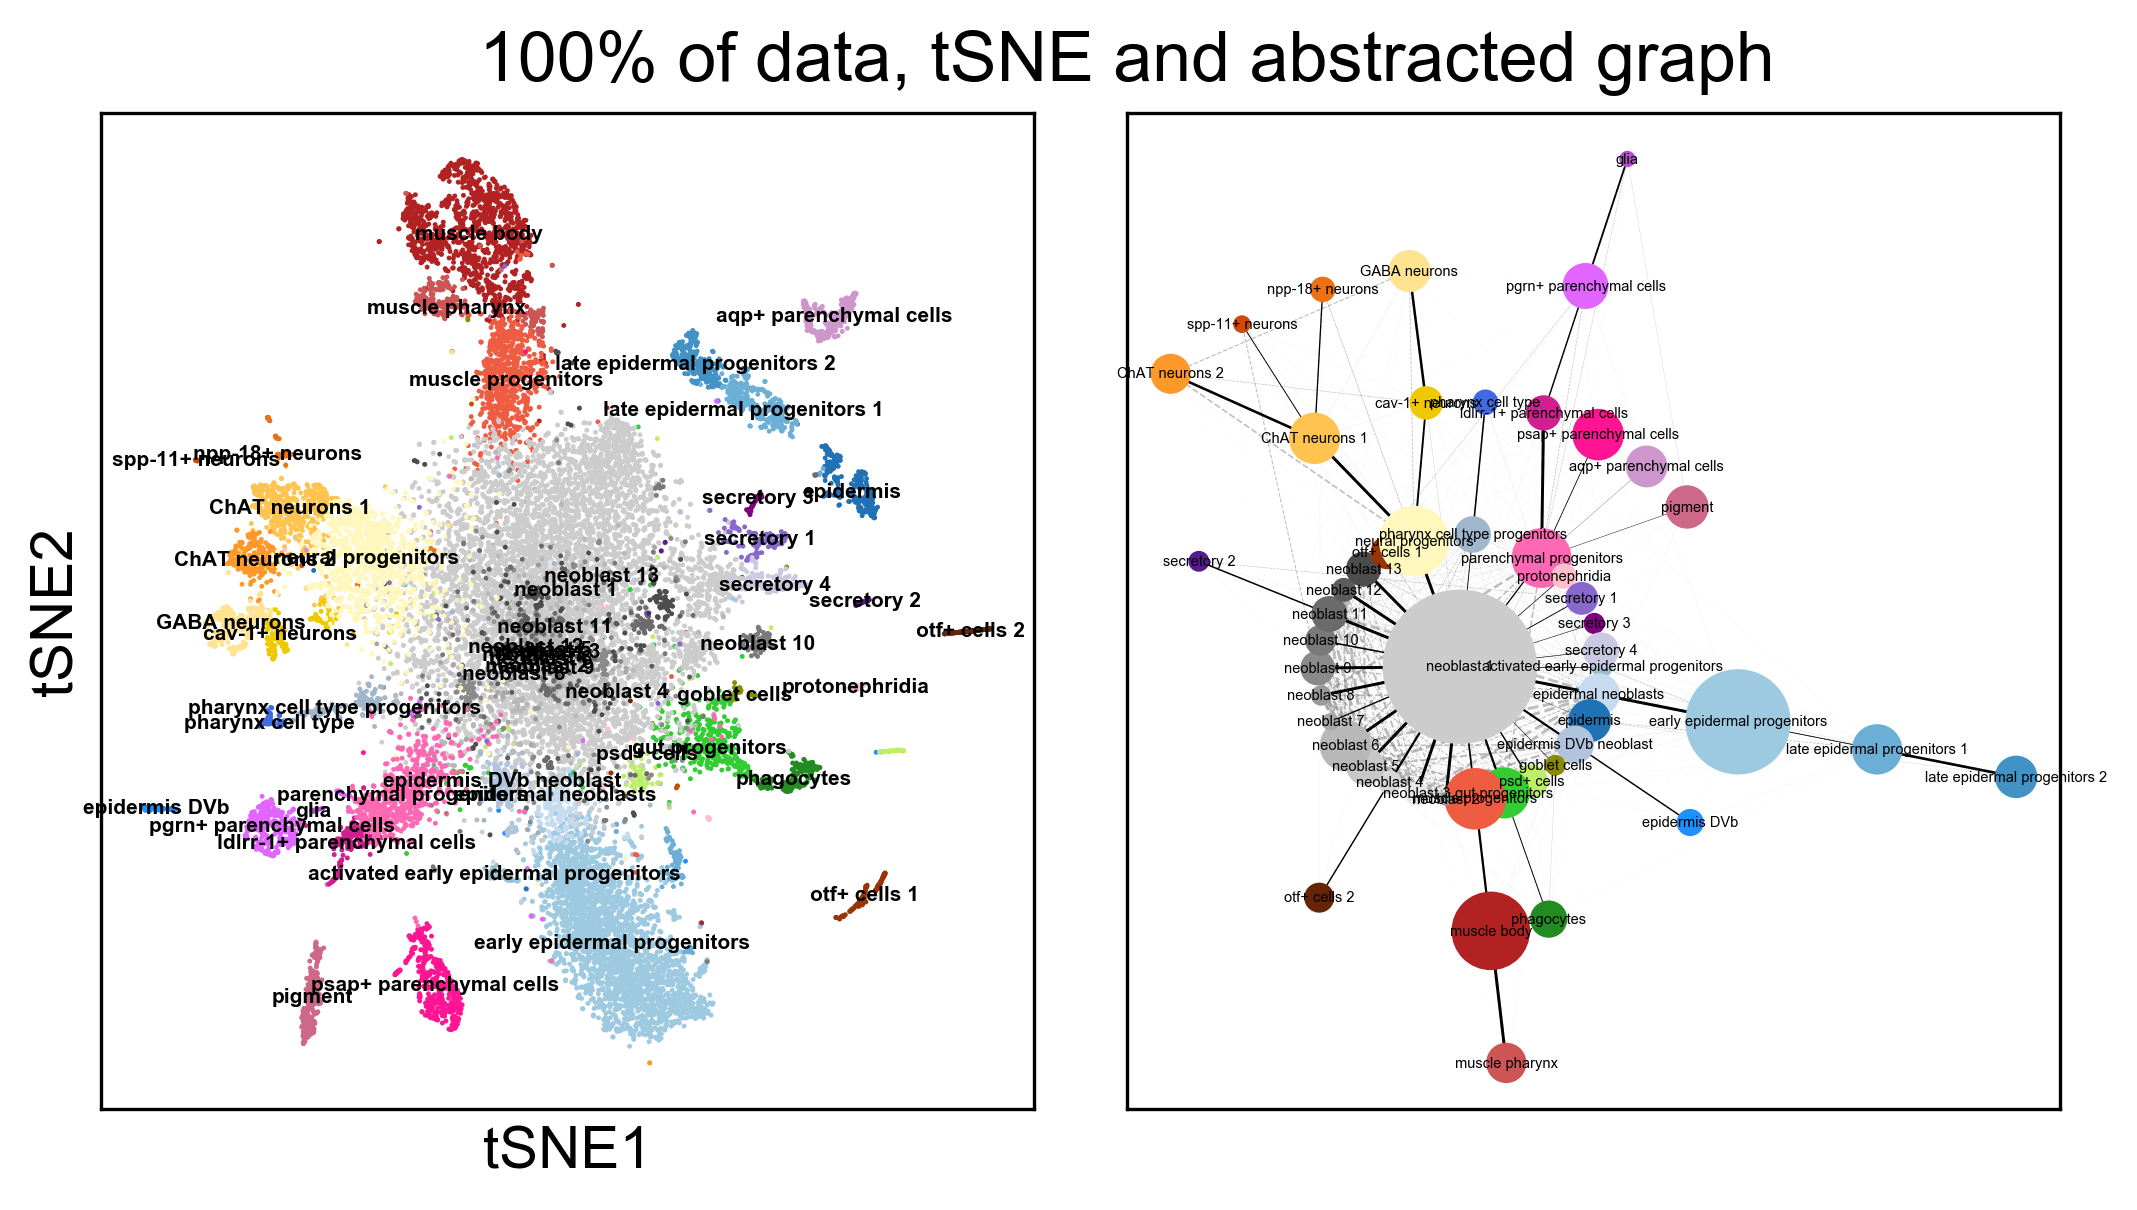

In [4]:
sc.pl.paga_compare(adata, title='100% of data, tSNE and abstracted graph', **paga_plot_params)

Subsampling to 80% of the data, 17289 cells.

In [5]:
adata_subsampled = sc.read('./write/planaria.h5ad')
sc.pp.subsample(adata_subsampled, fraction=0.8)
adata_subsampled.n_obs

17289

In [6]:
sc.pp.neighbors(adata_subsampled, n_neighbors=30)
sc.tl.paga(adata_subsampled, groups='clusters')

computing neighbors
    initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    using data matrix X directly
    finished (0:00:14.96)
running partition-based graph abstraction (PAGA)
    initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    finished (0:00:01.34)


We recover the same graph as with 100% of the data.

saving figure to file ./figures/paga_compare_80percent.png


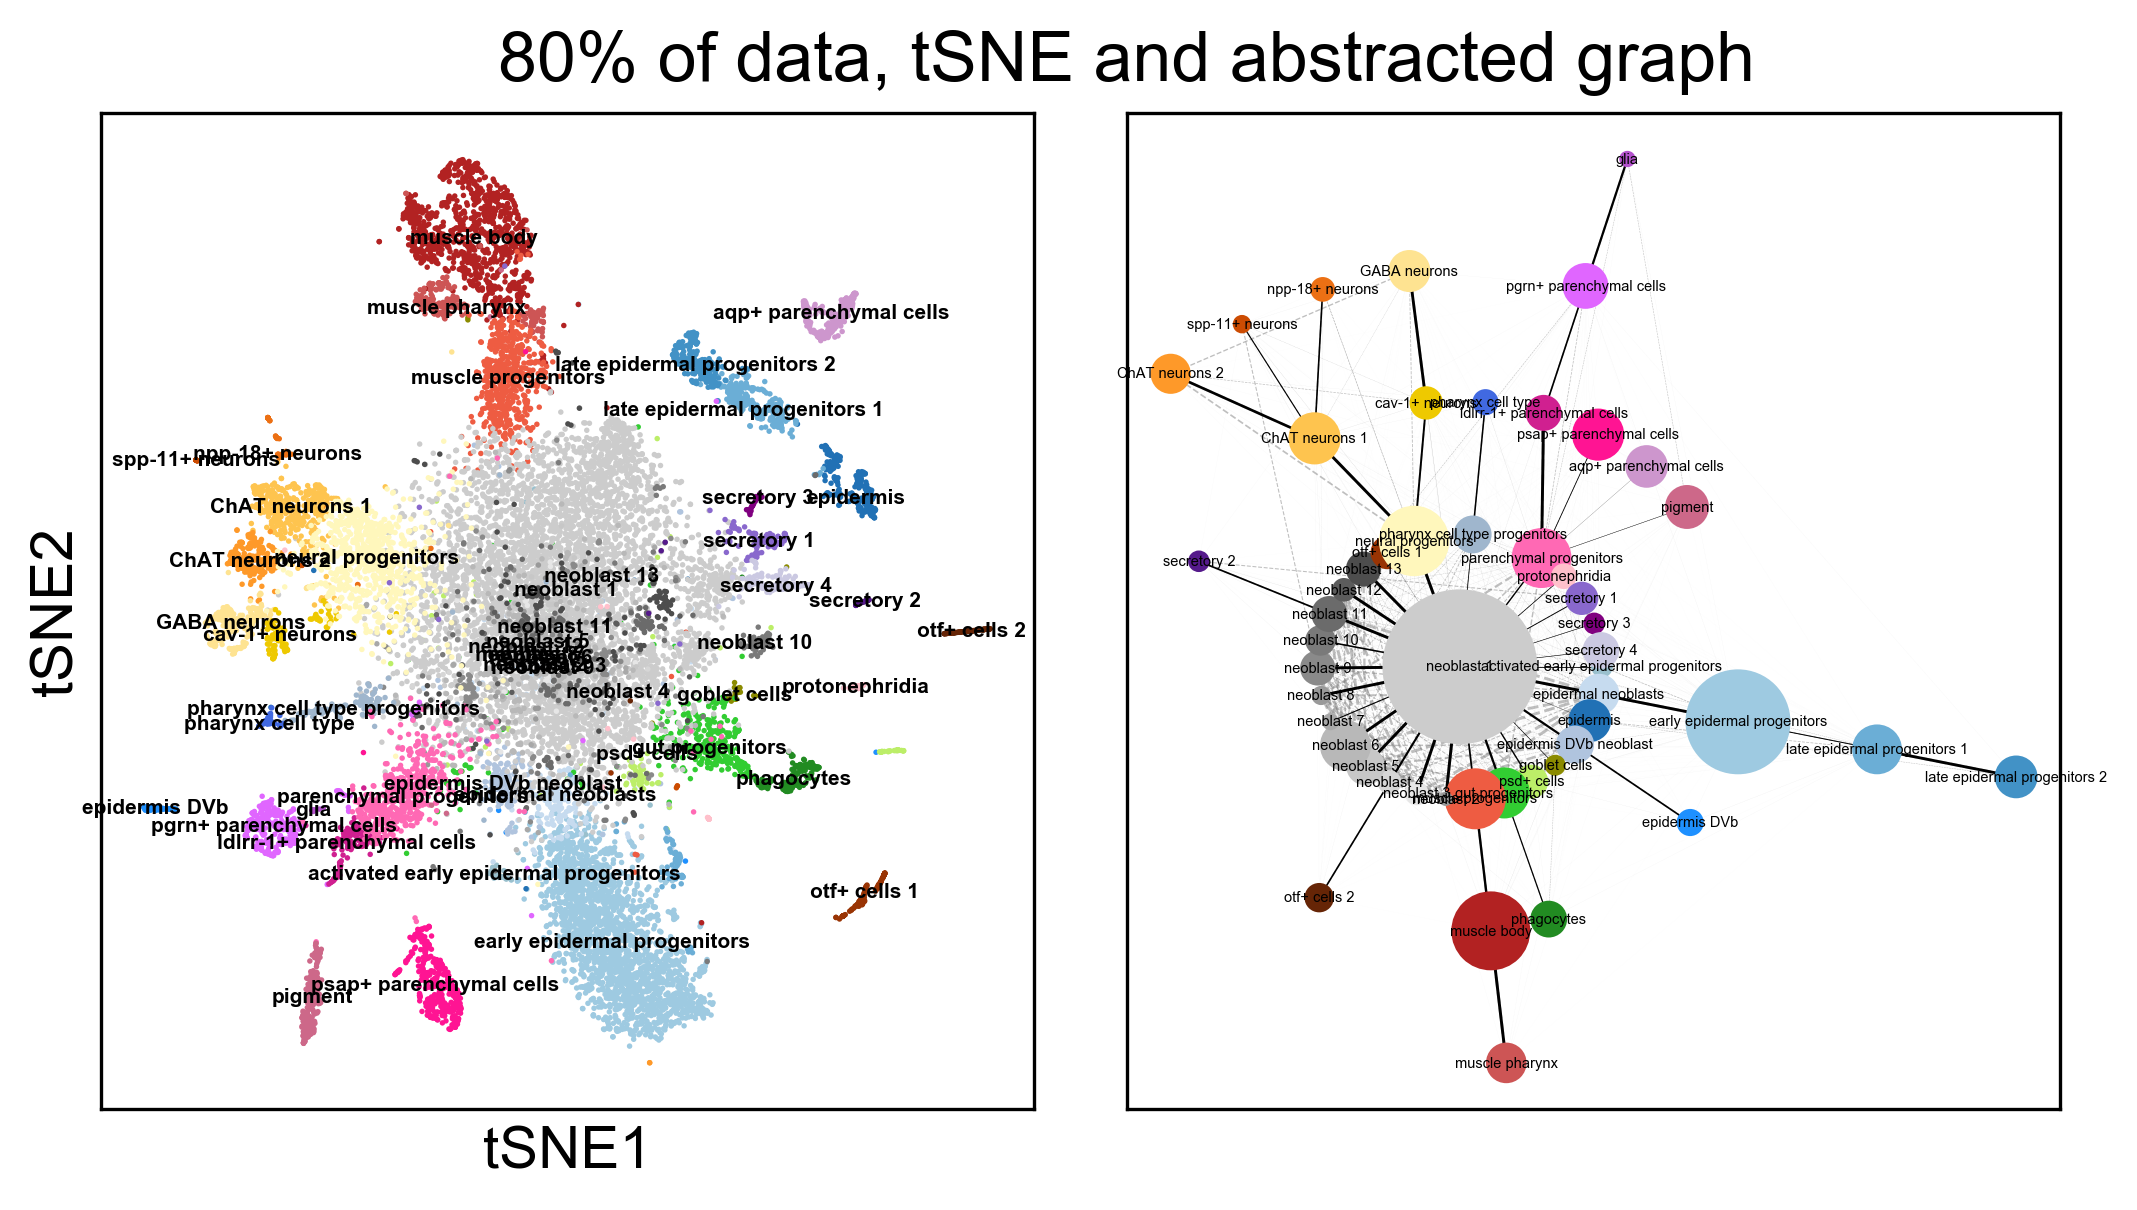

In [7]:
sc.pl.paga_compare(adata_subsampled, title='80% of data, tSNE and abstracted graph', **paga_plot_params, save='_80percent')

Subsampling to 10% of the data, 2161 cells.

In [8]:
adata_subsampled = sc.read('./write/planaria.h5ad')
sc.pp.subsample(adata_subsampled, fraction=0.1)
adata_subsampled.n_obs

2161

In [9]:
sc.pp.neighbors(adata_subsampled, n_neighbors=30)
sc.tl.paga(adata_subsampled, groups='clusters')

computing neighbors
    initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    using data matrix X directly
    finished (0:00:02.30)
running partition-based graph abstraction (PAGA)
    initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    finished (0:00:00.57)


saving figure to file ./figures/paga_compare_10percent.png


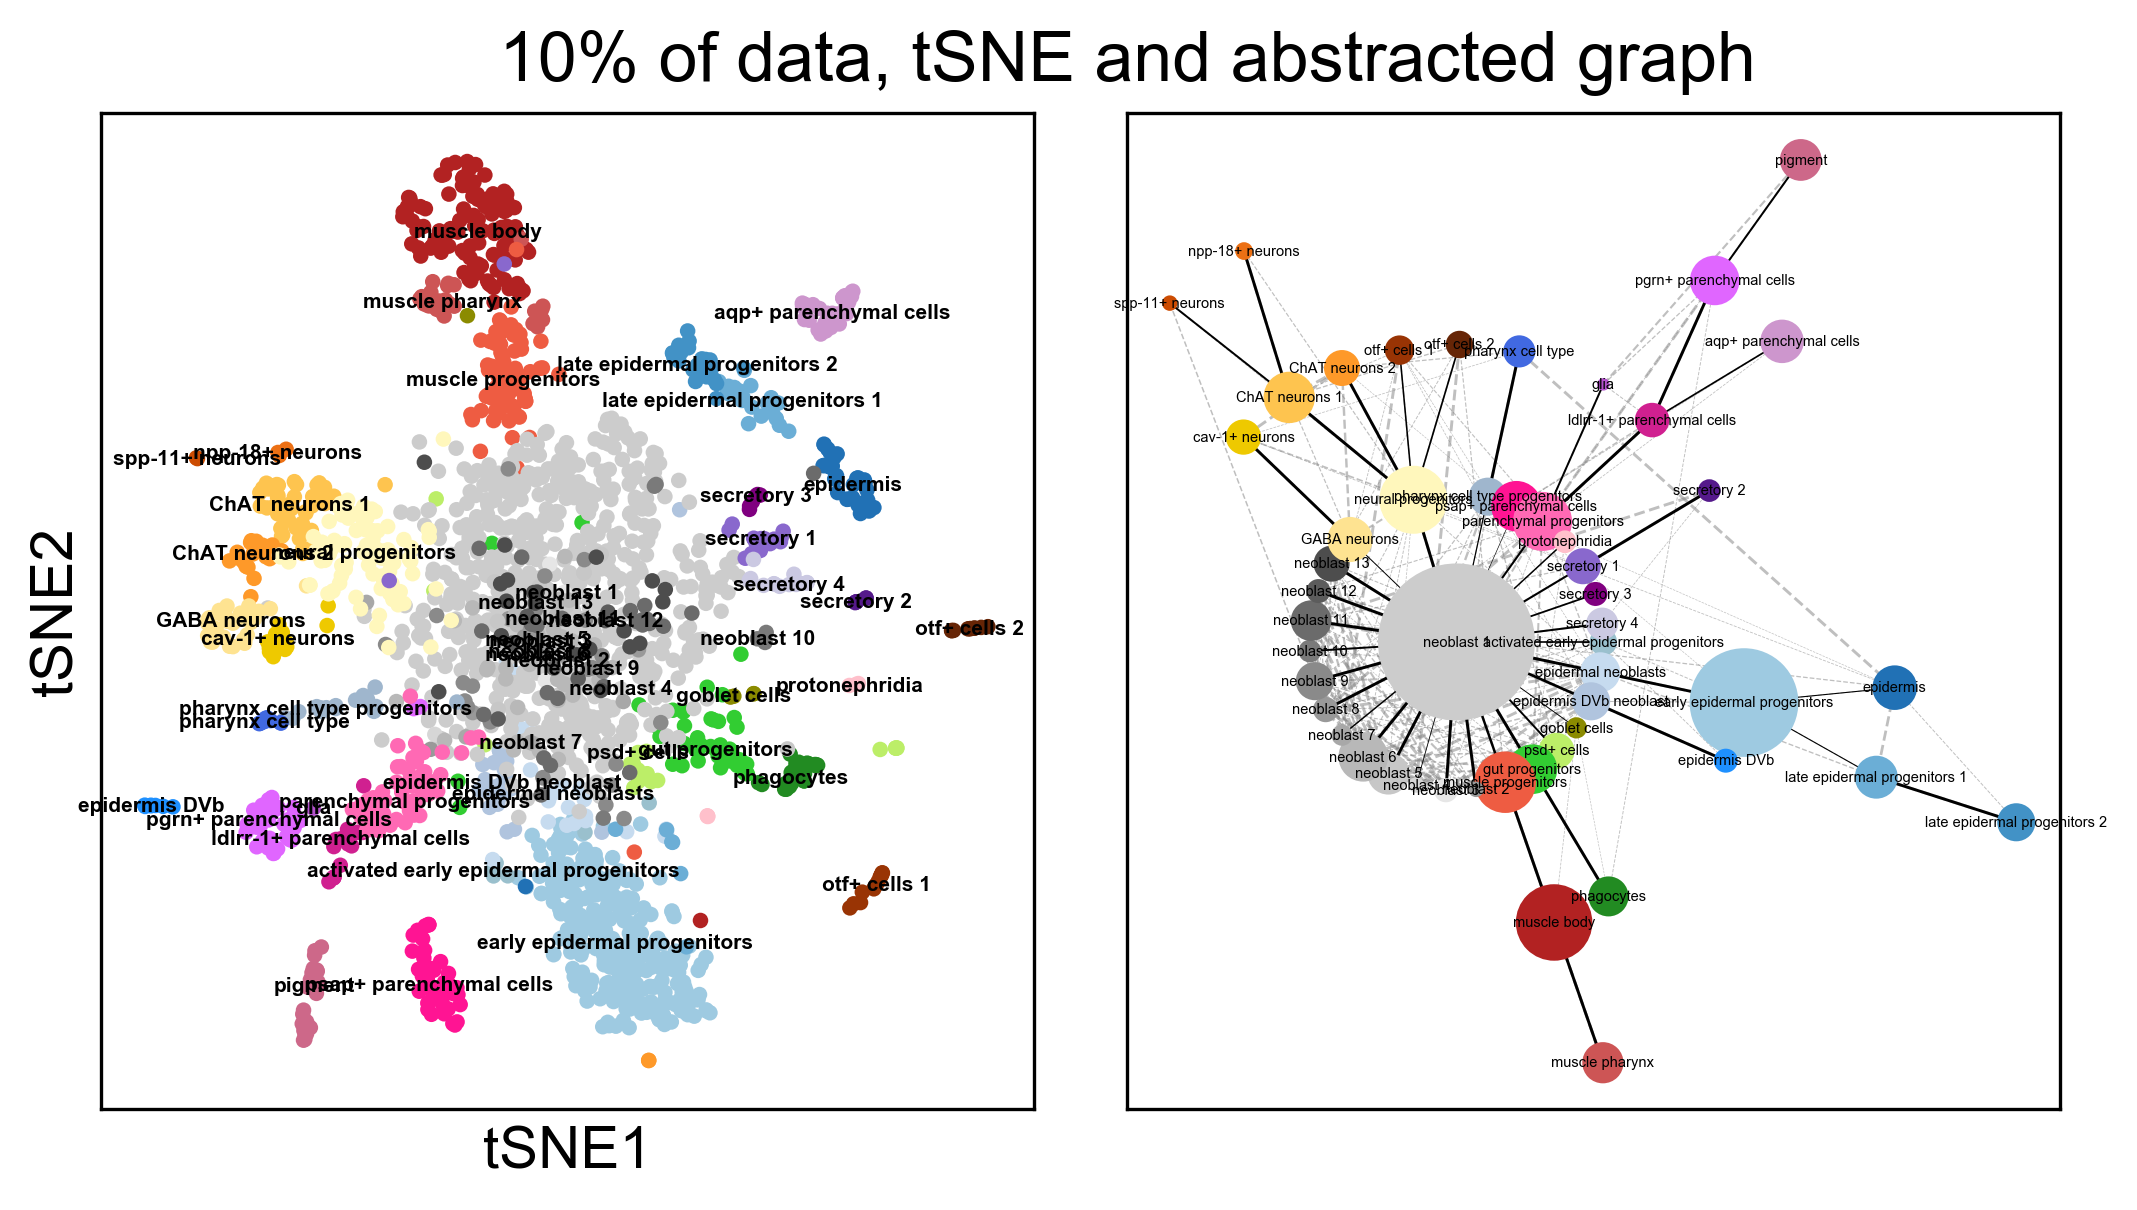

In [12]:
sc.pl.paga_compare(adata_subsampled, title='10% of data, tSNE and abstracted graph', threshold_dashed=0.02, **paga_plot_params, save='_10percent')